# Análisis de campañas de marketing
#### Análisis exploratorio de datos con Python
Éste dataset fue tomado de la plataforma Kaggle, este dataset fue cargado por [Jack Daoud](https://www.kaggle.com/jackdaoud/marketing-data). Para mayor información sobre éste u otros datasets te invito a explorar la pagina principal, es bastante entretenido [Kaggle](https://www.kaggle.com/).

##### Descripción del dataset
Este dataset fue facilitado a los estudiantes para el proyecto final de la Msc. in Business Analytics con la intención de probar sus habilidades de análisis estadistico. De manera general el dataset presenta algunos datos socio-demográficos de los clientes de una tienda posicionada a nivel mundial, cantidad de compras realizadas por cliente en sus distintos medios (tienda física, página web, catálogo), la cantidad gastada en los distintos productos (carnes, vinos, frutas, etc.) y el éxito de las distintas campañas de marketing empleadas por la tienda.

#### Objetivo
Analizar el desempeño de las campañas de marketing de una empresa posicionada en distinos paises y proponer soluciones a los problemas de dichas campañas. El trabajo se separa en 4 secciones:
- Análisis exploratorio de datos
- Análisis estadístico
- Visualización de datos
- Recomendaciones a los superiores en base a los hallazgos realizados

## Sección 1. Análisis exploratorio de datos.
En esta sección trabajaremos sobre algunas preguntas de este dataset:
- ¿Existen valores nulos o atípicos? ¿Cómo manejarlos?
- ¿Existen campos que necesitan alguna transformación?
- ¿Se observan patrones o anormalidades en los datos?

Lo primero que necesitamos hacer es cargar las librerias que necesitaremos para tratar con estos dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importamos el archivo csv con el que vamos a trabajar y recopilamos su información para comenzar con la exploración de los datos.

In [2]:
df = pd.read_csv('C:/Users/simon/Documents/Projects/Marketing/marketing_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

##### Limpieza de datos
Con este primer acercamiento a los datos, existe información a resaltar:
- Columna Income presenta un espacio en blanco, por lo cual habrá que corregir el nombre
- Habrá que transformar el tipo de datos de la columna Income de 'object' a 'float' ya que estamos hablando del ingreso monetario del cliente.
- Habrá que transformar el tipo de datos de la columna 'Dt_Customer' de 'object' a 'datetime' ya se que se esta hablando de la fecha en la cual la persona se convirtió en cliente.
- Debido a que únicamente trabajaremos con esta base de datos, la columna 'ID' del cliente, no nos brindará mayor información así que podemos deshecharla.

Corregiremos estos datos paso a paso. Empezando con la corrección del nombre de la columna 'Income'.

In [3]:
df.columns = df.columns.str.replace(' ','')

Observamos los primeros datos de nuestra tabla.

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


Se puede observa que la columna 'Income' posee algunos caracteres que se tienen que remover para poder hacer la transformación del tipo de datos. Por ello vamos a eliminar los simbolos de '$' y ','.

In [5]:
df.Income = df['Income'].str.replace('$','')

In [6]:
df.Income = df['Income'].str.replace(',','')

In [7]:
df.Income = df.Income.astype(float)

El siguiente paso es transformar los datos de la columna 'Dt_Customer' de 'object' a 'datetime' para tener un mejor manejo de ellos.

In [8]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

El siguiente paso es eliminar la columna 'ID' para obtener nuestra base de datos más limpia.

In [9]:
df_clean = df.drop('ID',1)

In [10]:
df_clean

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,2013-03-07,99,372,18,...,11,4,0,0,0,0,0,0,0,US
2236,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,...,3,8,0,0,0,0,0,0,0,SP
2237,1976,Graduation,Divorced,46310.0,1,0,2012-12-03,99,185,2,...,5,8,0,0,0,0,0,0,0,SP
2238,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,...,10,3,0,0,0,0,0,0,0,IND


El siguiente paso en nuestra limpieza de datos corresponde a la busqueda de valores vacíos dentro de nuestra base de datos.

In [11]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Se observa que en la columna de 'Income' hay datos faltantes, estos valores los podemos manejar reemplazando dichos datos faltantes con los valores promedio de dicha columna, esto para no alterar la estadísitica general, pero antes de reemplazarlos, haremos un histograma de los valores para observar su distribución y buscar por valores que puedan alterar el valor promedio.

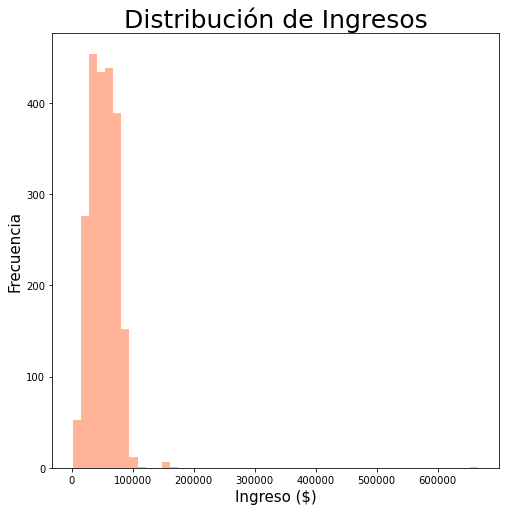

In [29]:
plt.figure(figsize = (8,8))
sns.distplot(a = df.Income, kde = False, color = 'orangered')
plt.ylabel('Frecuencia', fontsize = 15);
plt.xlabel('Ingreso ($)', fontsize = 15);
plt.title('Distribución de Ingresos', fontsize = 25);

Podemos observar que existen valores por encima de la distribución normal de los ingresos de los clientes por lo cual pueden afectar el valor promedio de los ingresos. Por tanto para reemplazar los valores vacíos de la columna 'Income', se tomaran únicamente los ingresos por debajo de los $200,000 para calcular el promedio y hacer el reemplazo de los valores. 

In [13]:
df_clean.Income.fillna(df_clean[df_clean['Income']<200000].Income.mean(), inplace = True)

##### Análisis exploratorio de datos
Una vez terminada la limpieza básica de los datos de nuestro dataset, continuaremos con el análisis exploratorio de los datos.

Comenzaremos con una descripción estadistica básica.

In [14]:
df_clean.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52244.279319,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,11.984069,25037.813463,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Podemos agregar algunas columnas al dataset como:
- El total de hijos por cliente.
- El gasto total.
- El número total de compras.
- El total de campañas exitosas.

In [15]:
df_clean['Sons'] = df_clean.Kidhome + df_clean.Teenhome
df_clean['TotalMnt'] = df_clean[[a for a in df_clean.columns if 'Mnt' in a]].sum(axis=1)
df_clean['TotalPurchases'] = df_clean[[a for a in df_clean.columns if 'Purchases' in a]].sum(axis = 1)
df_clean['TotalCmp'] = df_clean[[a for a in df_clean.columns if 'Cmp' in a]].sum(axis = 1)

Con estas nuevas columnas podemos hacer un análisis básico de los valores relevantes. Esto lo haremos con gráficas de cajas

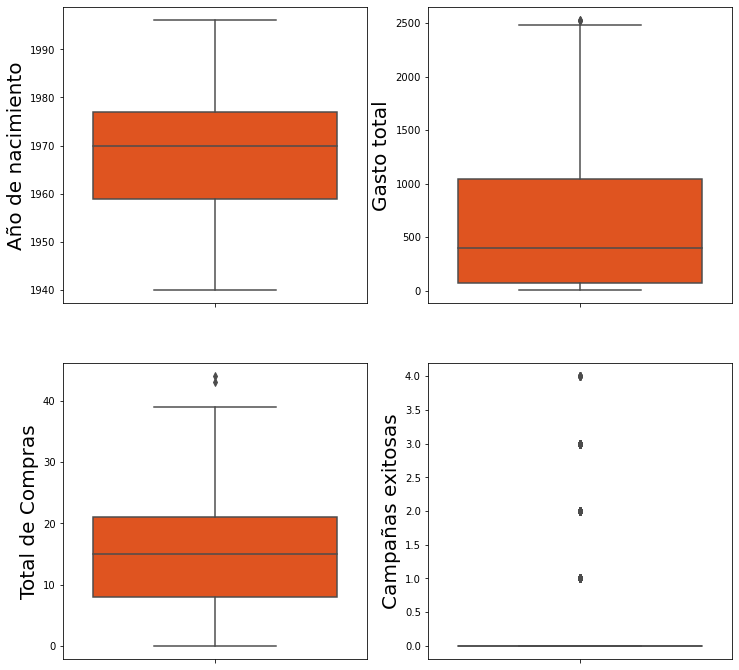

In [30]:
plt.figure(figsize = (12,12))
plt.subplot(2,2,1)
sns.boxplot(y = df_clean.Year_Birth, color = 'orangered')
plt.ylabel('Año de nacimiento', fontsize = 20)

plt.subplot(2,2,2)
sns.boxplot(y = df_clean.TotalMnt, color = 'orangered')
plt.ylabel('Gasto total', fontsize = 20)

plt.subplot(2,2,3)
sns.boxplot(y = df_clean.TotalPurchases, color = 'orangered')
plt.ylabel('Total de Compras', fontsize = 20)

plt.subplot(2,2,4)
sns.boxplot(y = df_clean.TotalCmp, color = 'orangered')
plt.ylabel('Campañas exitosas', fontsize = 20);

Estos graficos nos muestran una serie de valores atípicos en los años de nacimiento, pues existen valores de año de nacimiento alrededor de 1900, si fuera de esta manera, dicha persona o personas tendrían edades entre 100 a 120 años, esto podría deberse a un posible error en la entrada de datos. Eliminaremos los datos que se encuentren debajo de 1920.

In [17]:
df_clean = df_clean[df_clean['Year_Birth']>1920]

Este procedimiento nos ayuda a limpiar datos que no suelen verse de manera dierecta en los estadisticos básicos, es por ello que se realiza de esta manera. Mostraremos ahora la misma gráfica ya con los datos procesados.

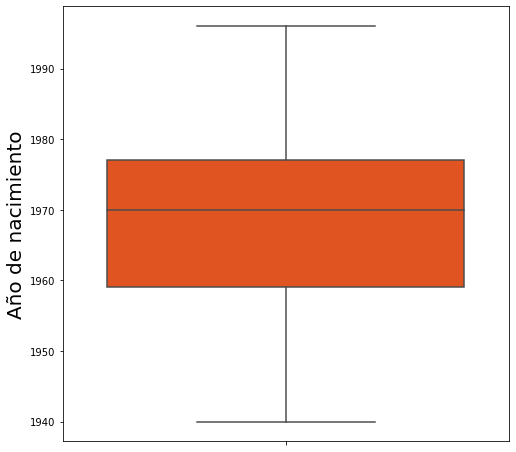

In [27]:
plt.figure(figsize = (8,8))
sns.boxplot(y = df_clean.Year_Birth, color = 'orangered');
plt.ylabel('Año de nacimiento', fontsize = 20);

Empecemos a observar que relaciones existen entre las distintas variables de nuestro dataset.

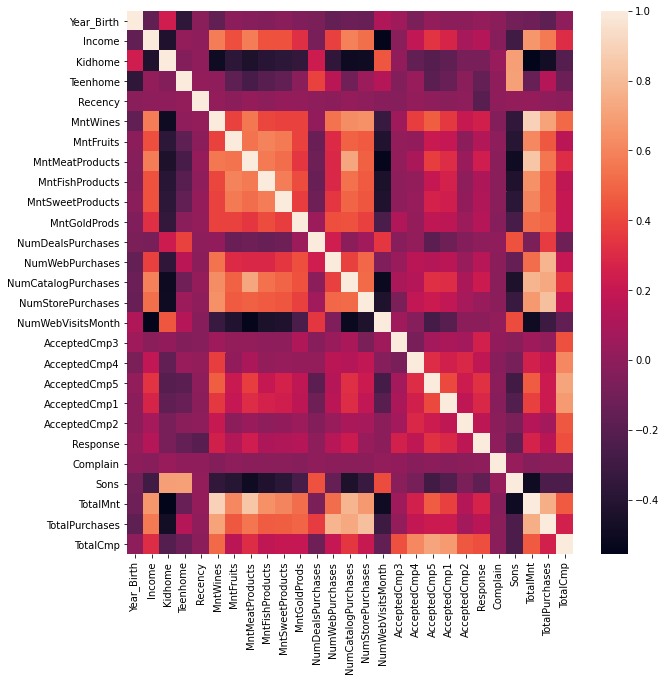

In [20]:
corr = df_clean.corr()

plt.figure(figsize = (10,10))
sns.heatmap(corr)

Este mapa de calor nos permite observar las correlaciones existentes entre las distintas variables, algunos puntos a destacar de esta información es que:
- Los hijos tienen una correlación negativa con la cantidad de gastos realizados, es decir, entre más hijos se tenga menor es el gasto en los productos, en un principio se podría pensar que entre más personas dependan de ti mayor será el gasto realizado, una explicación razonable a este comportamiento es que existen más gastos, por lo cual los padres necesitan emplear estrategias de ahorro.
- Existe una diferencia entre el gasto de los padres cuando tienen un hijo pequeño a los que tienen un hijo adolecente. Si el hijo es pequeño, realizan menos gastos que cuando el hijo es mayor.
- El numero de visitantes mensuales en la página web posee una correlación negativa con los gastos realizados por cliente, lo cual podría decirse que la página web no impresiona a sus visitantes, quiza habría que emplear alguna forma de captar la atención de las personas para incitarlas a realizar más compras.
- Parece ser que las campañas tienen un impacto en el gasto realizado por los clientes.

De todas maneras se necesita mayor exploración en los datos para confirmar estos resultados preliminares.


## Sección 2. Análisis estadístico
En esta sección se presentaran algunos modelos estadisticos sobre los comportamientos de los clientes en cuanto a las compras en la tienda, es decir, se trataran de observar qué factores están relacionados con la cantidad de compras.

<Figure size 720x720 with 0 Axes>

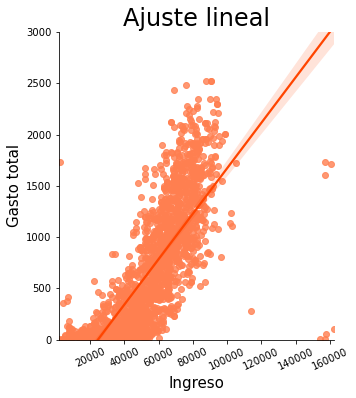

In [52]:
plt.figure(figsize = (10,10));
sns.lmplot(x = 'Income',y = 'TotalMnt', 
           data = df_clean[df_clean['Income']<200000],
          scatter_kws = {'color' : 'coral'},
          line_kws = {'color' : 'orangered'}).set(ylim=(0,3000),);
plt.ylabel('Gasto total', fontsize = 15);
plt.xlabel('Ingreso', fontsize = 15);
plt.xticks(rotation = 25);
plt.title('Ajuste lineal', fontsize = 24);

Podemos observar que existe una tendencia en cuanto al gasto realizado por cliente, entre mayor sea el ingreso de la persona mayor es el gasto realizado en la tienda.

<Figure size 720x720 with 0 Axes>

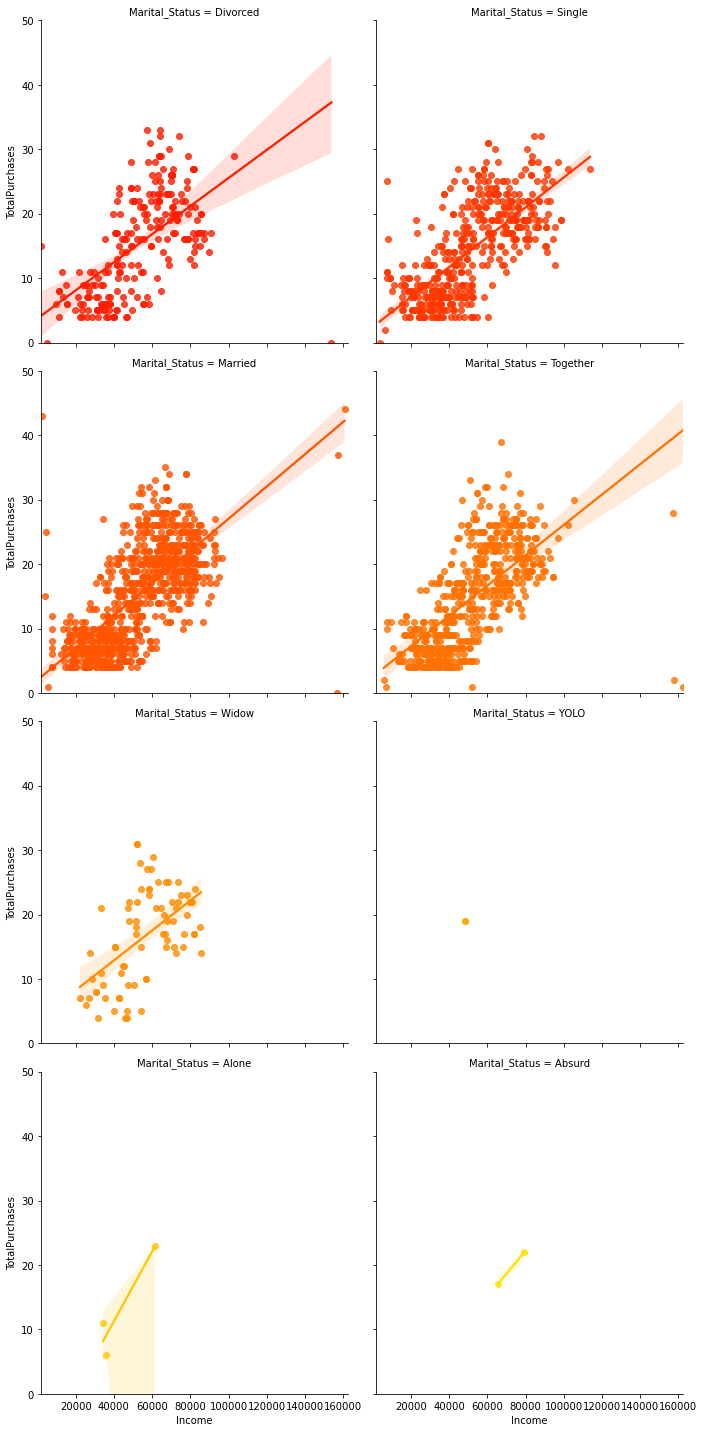

In [32]:
plt.figure(figsize = (10,10))
sns.lmplot(x = 'Income', y = 'TotalPurchases', 
           data = df_clean[df_clean.Income<200000],
            hue = 'Marital_Status',
           col = 'Marital_Status', col_wrap = 2,
          palette = 'autumn').set(ylim=(0,50),);



Podemos observar que sin importar el estado civil del cliente, siempre hay una tendencia de mayor compras a medida que los ingresos del ciente son mayores.

<Figure size 720x720 with 0 Axes>

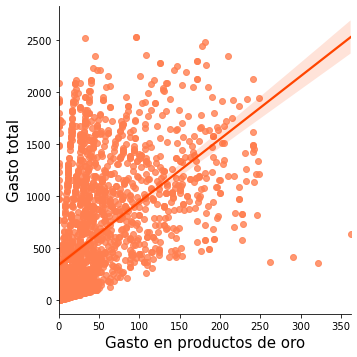

In [53]:
plt.figure(figsize = (10,10))
sns.lmplot(x = 'MntGoldProds', y = 'TotalMnt', data = df_clean,
          scatter_kws = {'color' : 'coral'},
          line_kws = {'color' : 'orangered'})
plt.xlabel('Gasto en productos de oro', fontsize = 15)
plt.ylabel('Gasto total', fontsize = 15);


Podemos observar una tendencia interesante, se puede observar que entre mayor es el gasto en productos de oro por el cliente, mayor es el gasto total de dicho cliente.

<Figure size 576x576 with 0 Axes>

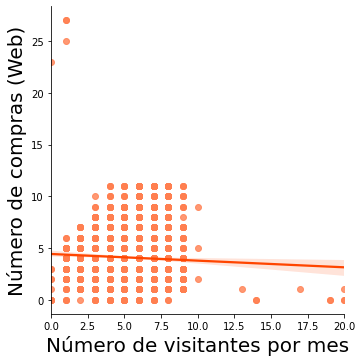

In [55]:
plt.figure(figsize = (8,8))
sns.lmplot(x = 'NumWebVisitsMonth', y = 'NumWebPurchases', data = df_clean,
          scatter_kws = {'color':'coral'},
          line_kws = {'color':'orangered'})
plt.xlabel('Número de visitantes por mes',fontsize = 20)
plt.ylabel('Número de compras (Web)', fontsize = 20);

Podemos observar que existe una tendencia negativa entre la cantidad de visitantes en la pagina web de la empresa y la cantidad de compras a través de éste medio, es decir, la página web no está teniendo un buen impacto en las personas para realizar más compras.

## Sección 3. Visualización de datos
En esta sección realizaremos algunas asociaciones entre las distintas variables, para poder conocer un poco más sobre el impacto que han tenido las campañas de marketing en la cantidad de compras realiadas por los clientes.

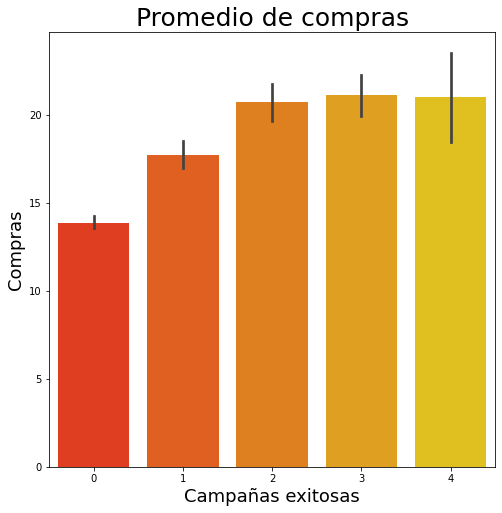

In [49]:
plt.figure(figsize = (8,8))
sns.barplot(x = 'TotalCmp', y = 'TotalPurchases', data = df_clean,
           palette = 'autumn')
plt.xlabel('Campañas exitosas', fontsize = 18)
plt.ylabel('Compras', fontsize = 18);
plt.title('Promedio de compras', fontsize = 25);

Esta gráfica nos muestra que sí existe un impacto en la cantidad de compras de acuerdo a las campañas de marketing exitosas por cliente, al decir campañas exitosas nos referimos a las campañas a las cuales el cliente realizó la compra debido a dicha campaña. 

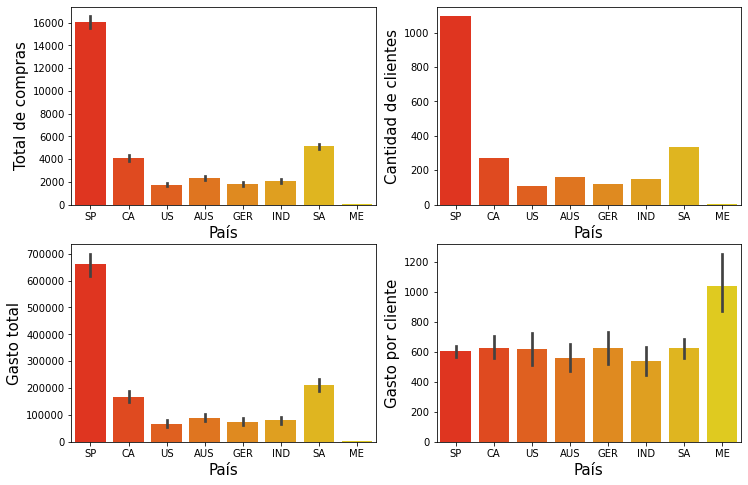

In [166]:
plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
sns.barplot(x = 'Country', y = 'TotalPurchases', data = df_clean, estimator = np.sum,
           palette = 'autumn')
plt.xlabel('País', fontsize = 15)
plt.ylabel('Total de compras', fontsize = 15);

plt.subplot(2,2,2)
sns.countplot('Country', data = df_clean, palette = 'autumn')
plt.xlabel('País', fontsize = 15)
plt.ylabel('Cantidad de clientes', fontsize = 15);

plt.subplot(2,2,3)
sns.barplot(x = 'Country', y = 'TotalMnt', data = df_clean, estimator = np.sum,
           palette = 'autumn')
plt.xlabel('País', fontsize = 15)
plt.ylabel('Gasto total', fontsize = 15);

plt.subplot(2,2,4)
sns.barplot(x = 'Country', y = 'TotalMnt', data = df_clean,
           palette = 'autumn')
plt.xlabel('País', fontsize = 15)
plt.ylabel('Gasto por cliente', fontsize = 15);

Estas graficas nos muestran la cantidad total de compras, la cantidad total de clientes y el gasto total por país. se puede observar que la gran mayoría de clientes son de España y es ahí mismo donde existe una mayor ganancia por parte de la empresa, sin embargo cuando observamos el gasto promedio por cliente, todos los países presentan una estadística similar, es decir, sin importar que país sea el cliente, gastan de manera muy similar, esto exceptuando a México ya que si bien el gasto promedio por cliente es mucho mayor, la cantidad de personas que compran en México es muy pequeña, por lo que no se puede asegurar que sea el país que gasta más por cliente que compra en la empresa.

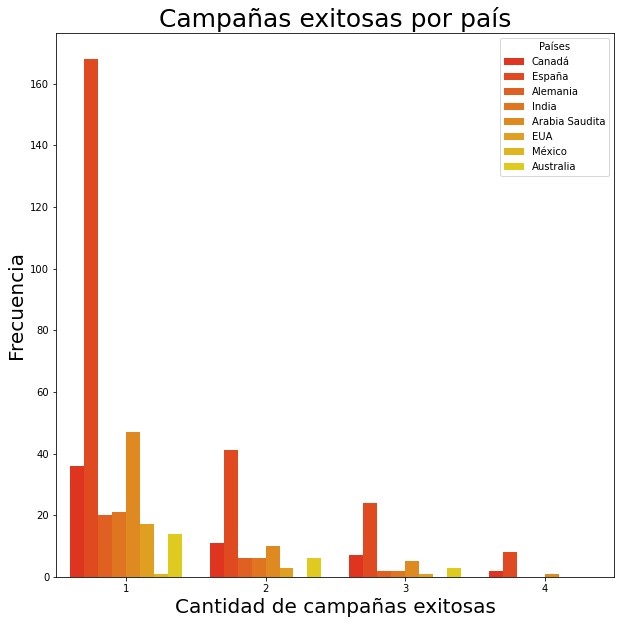

In [57]:
plt.figure(figsize = (10,10))
sns.countplot('TotalCmp', data = df_clean[df_clean.TotalCmp>0], hue = 'Country',
             palette='autumn')
plt.xlabel('Cantidad de campañas exitosas', fontsize = 20)
plt.ylabel('Frecuencia', fontsize = 20);
plt.legend(labels =['Canadá', 'España', 'Alemania', 'India', 'Arabia Saudita', 'EUA',
                   'México', 'Australia'],
           title = 'Países', loc = 'upper right');
plt.title('Campañas exitosas por país', fontsize = 25);
#plt.gca().set_xticklabels([]);

Se observa que, además de España, Arabia Saudita es el país en donde hay más campañas exitosas. Es por ello que Arabia Saudita es el segundo país con mayor cantidad de compras y gastos realizados en la empresa, por lo tanto pdemos confirmar que las campañas de marketing sí han tenido un impacto positivo en el consumo realizado por los clientes. Además se observa que en ningún caso se obtuvieron 5 campañas exitosas de 5 posibles.

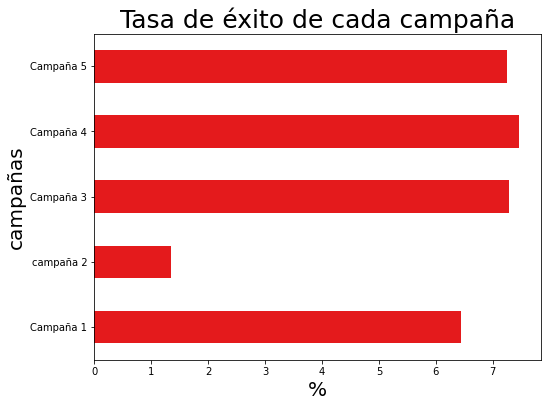

In [67]:
plt.figure(figsize = (8,6))
perc = (df_clean[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
          'AcceptedCmp4', 'AcceptedCmp5']].sum() / len(df_clean.AcceptedCmp1))*100
perc.plot(kind = 'barh', colormap = 'Set1')
plt.xlabel('%', fontsize = 20)
plt.ylabel('campañas', fontsize = 20)
plt.title('Tasa de éxito de cada campaña', fontsize = 25)
plt.gca().set_yticklabels(['Campaña 1', 'campaña 2', 'Campaña 3', 'Campaña 4', 'Campaña 5']);


Se muestra la tasa de éxito de cada una de las campañas, ahora si bien es cierto que las campañas han tenido un impacto positivo en la cantidad de compras realizadas por cliente, la tasa de éxito de cada campaña es muy bajo, por lo cual se necesitan realizar mejoras en el desempeño de dichas campañas.

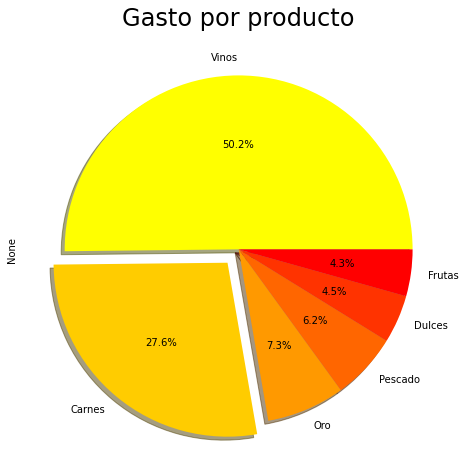

In [74]:
plt.figure(figsize = (8,8))
colormap = plt.cm.get_cmap('autumn');
df[[col for col in df.columns if 'Mnt' in col]].mean().sort_values(ascending = False).plot(kind = 'pie',
                                                                                          autopct='%1.1f%%',
                                                                                          labels = ['Vinos', 'Carnes', 'Oro', 'Pescado', 'Dulces', 'Frutas'],
                                                                                          explode =(0, 0.1, 0,0,0,0),
                                                                                          shadow = True,
                                                                                          colormap = colormap.reversed())

plt.title('Gasto por producto', fontsize = 24);

Se muestra que los clientes gastan, en promedio, mucho más en vinos que en los demás productos, mientras que en los productos que menos se gasta es en frutas

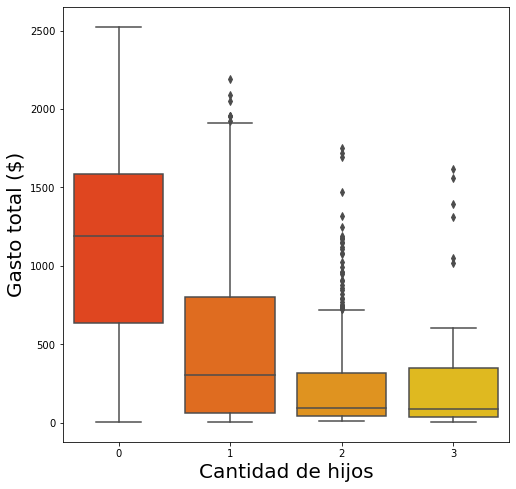

In [68]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'Sons', y = 'TotalMnt', data = df_clean, palette = 'autumn')
plt.xlabel('Cantidad de hijos', fontsize = 20)
plt.ylabel('Gasto total ($)', fontsize = 20);

Se observa que entre mayor sea la cantidad de hijos del cliente, menor es el gasto que realizan en la tienda.

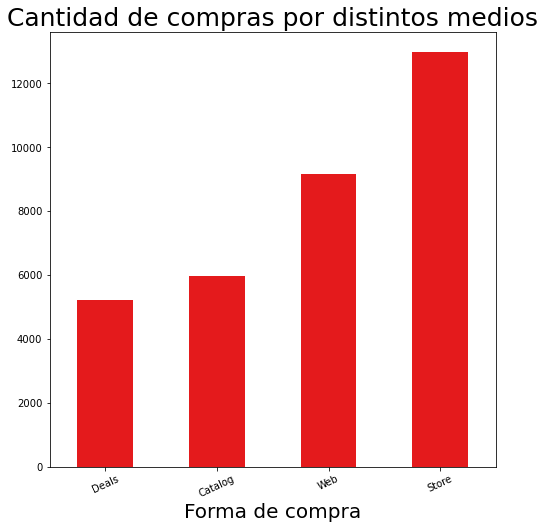

In [76]:
plt.figure(figsize = (8,8))
df_clean[['NumDealsPurchases','NumWebPurchases',
          'NumCatalogPurchases', 'NumStorePurchases']].sum().sort_values().plot(kind = 'bar',
                                                                               colormap = 'Set1')
plt.gca().set_xticklabels(['Deals', 'Catalog', 'Web', 'Store']);
plt.xticks(rotation = 25)
plt.xlabel('Forma de compra', fontsize = 20)
plt.title ('Cantidad de compras por distintos medios', fontsize = 25);

La gráfica nos muestra que la mayor cantidad de compras de los clientes se realiza directamente en la tienda, seguido por las compras a través de la página web.

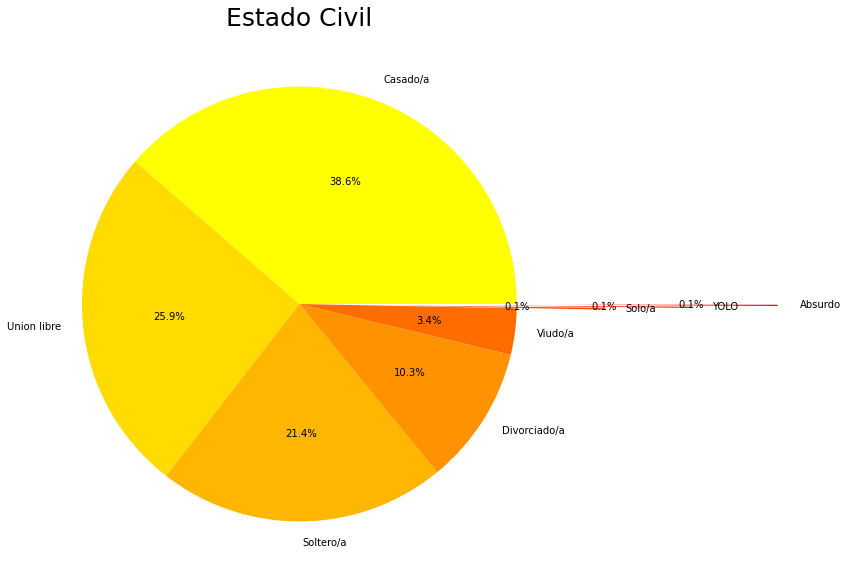

In [77]:
plt.figure(figsize = (10,10))
df_clean.Marital_Status.value_counts().plot(kind = 'pie', 
                                            explode = [0,0,0,0,0,0.4,0.8, 1.2],
                                           autopct ='%1.1f%%',
                                           labels=['Casado/a', 'Union libre', 'Soltero/a',
                                                   'Divorciado/a', 'Viudo/a', 'Solo/a',
                                                  'YOLO', 'Absurdo'],
                                           colormap = colormap.reversed())
plt.ylabel('');
plt.title('Estado Civil', fontsize = 25);

Aquí podemos observar que más del 60% de los clientes de la tienda estan en pareja.

## Sección 4. Recomendaciones
Con toda la información recolectada de la base de datos de la empresa, el análisis estadístico y la exploración de datos, es posible destacar ciertos puntos sobre el desempeño de las campañas de marketing de la empresa:

1. Las campañas sí tienen un impacto positivo en cuanto al consumo realizado por los clientes, a pesar de ello las tasas de éxito son bastante bajas (< 8%), se recomienda implementar nuevas nuevas campañas de marketing.

2. Se recomienda que las nuevas campañas de marketing esten dirigidas a los productos que menor consumo tienen, por ejemplo las _**frutas, dulces o pescados**_. De la misma manera se recomienda que se implementen campañas dirigidas a los países que menor consumo presentan, por ejemplo, _**Estados Unidos, México y Alemania**_.

3. Se recomienda mejorar la página web de la empresa, pues a pesar de que es el segundo medio que más compras presenta, la cantidad de compras realizadas por cliente es baja comparado con la cantidad de personas que visitan la página. 